In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

In [136]:
df = pd.read_csv("Rainfall.csv")

In [137]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [138]:
df['Rainfall'] = df['rainfall']

In [139]:
df = df.drop('rainfall', axis=1)

In [140]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,Rainfall
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,yes
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3,yes
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2,yes
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9,yes
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7,yes


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   sunshine                366 non-null    float64
 9            winddirection  365 non-null    float64
 10  windspeed               365 non-null    float64
 11  Rainfall                366 non-null    object 
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [142]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [143]:
df.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
sunshine                  0
         winddirection    1
windspeed                 1
Rainfall                  0
dtype: int64

In [144]:
df.columns = df.columns.str.strip()

In [145]:
df.shape

(366, 12)

In [146]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,Rainfall
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,yes
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3,yes
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2,yes
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9,yes
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7,yes


In [147]:
df.Rainfall.value_counts()

Rainfall
yes    249
no     117
Name: count, dtype: int64

In [148]:
df = df.drop('day', axis =1)

In [149]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,Rainfall
0,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,yes
1,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3,yes
2,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2,yes
3,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9,yes
4,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7,yes


In [150]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        1
Rainfall         0
dtype: int64

In [151]:
df['winddirection'] = df['winddirection'].fillna(df['winddirection'].mode()[0])
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].mean())

In [152]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
Rainfall         0
dtype: int64

In [153]:
df.Rainfall.value_counts()

Rainfall
yes    249
no     117
Name: count, dtype: int64

In [154]:
df['Rainfall'] = df['Rainfall'].map({'yes' : 1, 'no':0})

In [155]:
df.Rainfall.value_counts()

Rainfall
1    249
0    117
Name: count, dtype: int64

In [156]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,Rainfall
0,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,1
1,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3,1
2,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2,1
3,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9,1
4,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7,1


In [157]:
df.shape

(366, 11)

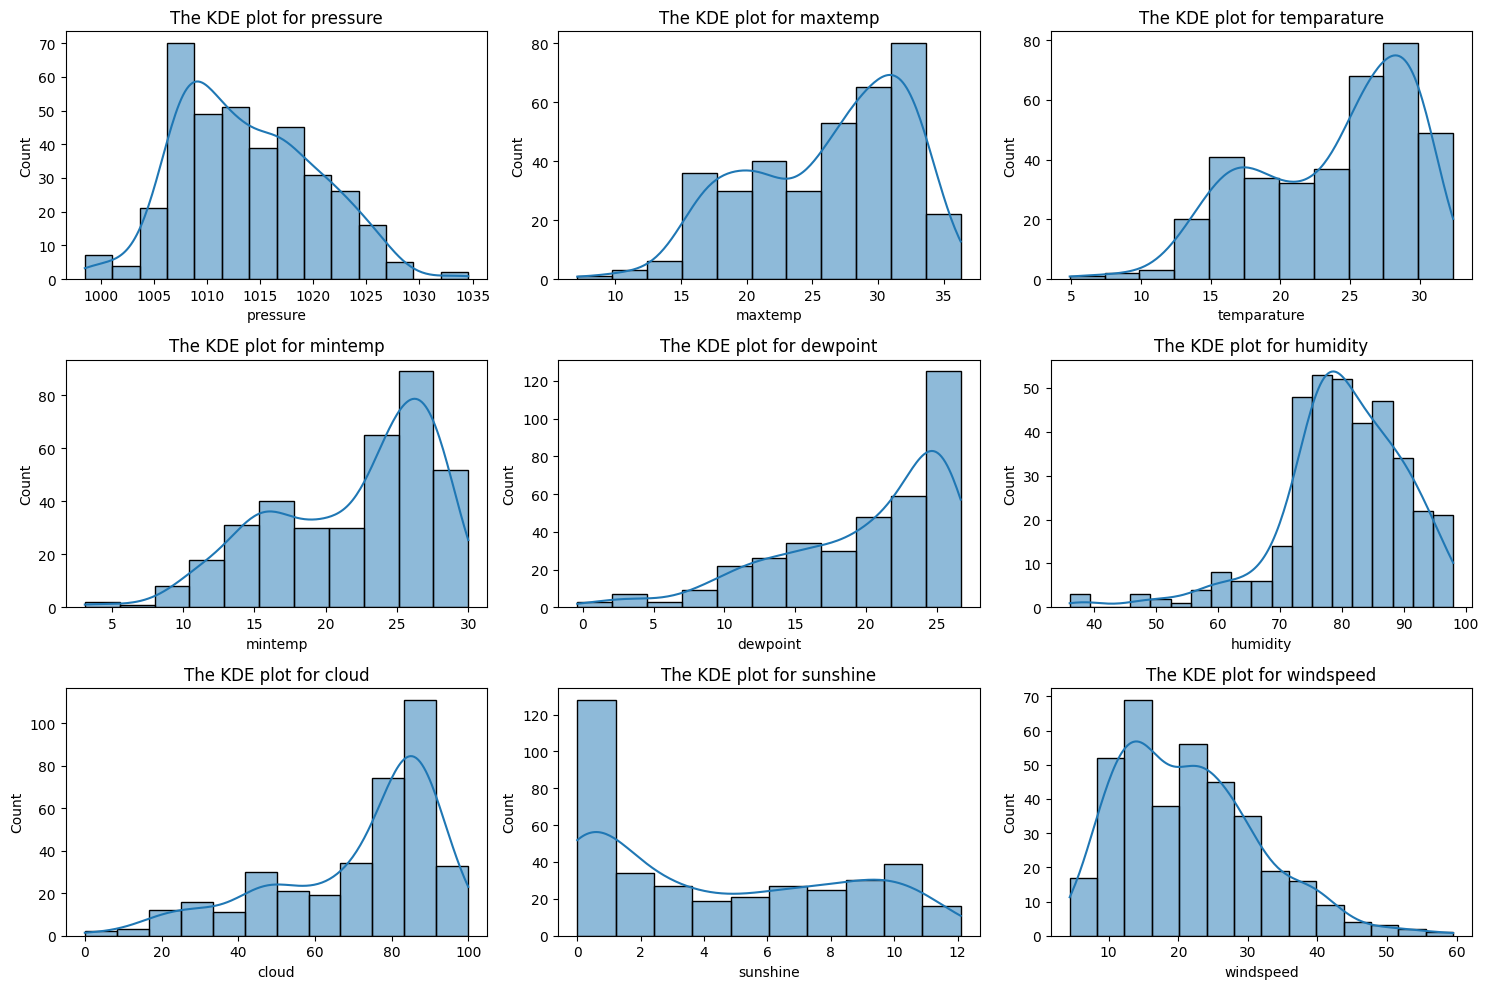

In [158]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
    plt.subplot(3,3,i)
    sns.histplot(df[column], kde=True)
    plt.title(f"The KDE plot for {column}")
plt.tight_layout()

Text(0.5, 1.0, 'Countplot of Rainfall distribution')

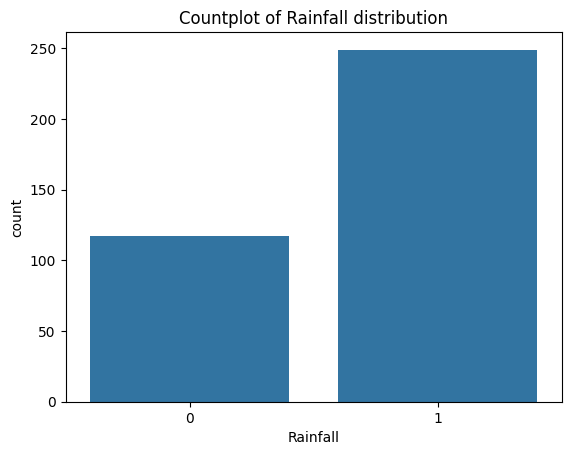

In [159]:
sns.countplot(x= df['Rainfall'])
plt.title("Countplot of Rainfall distribution")

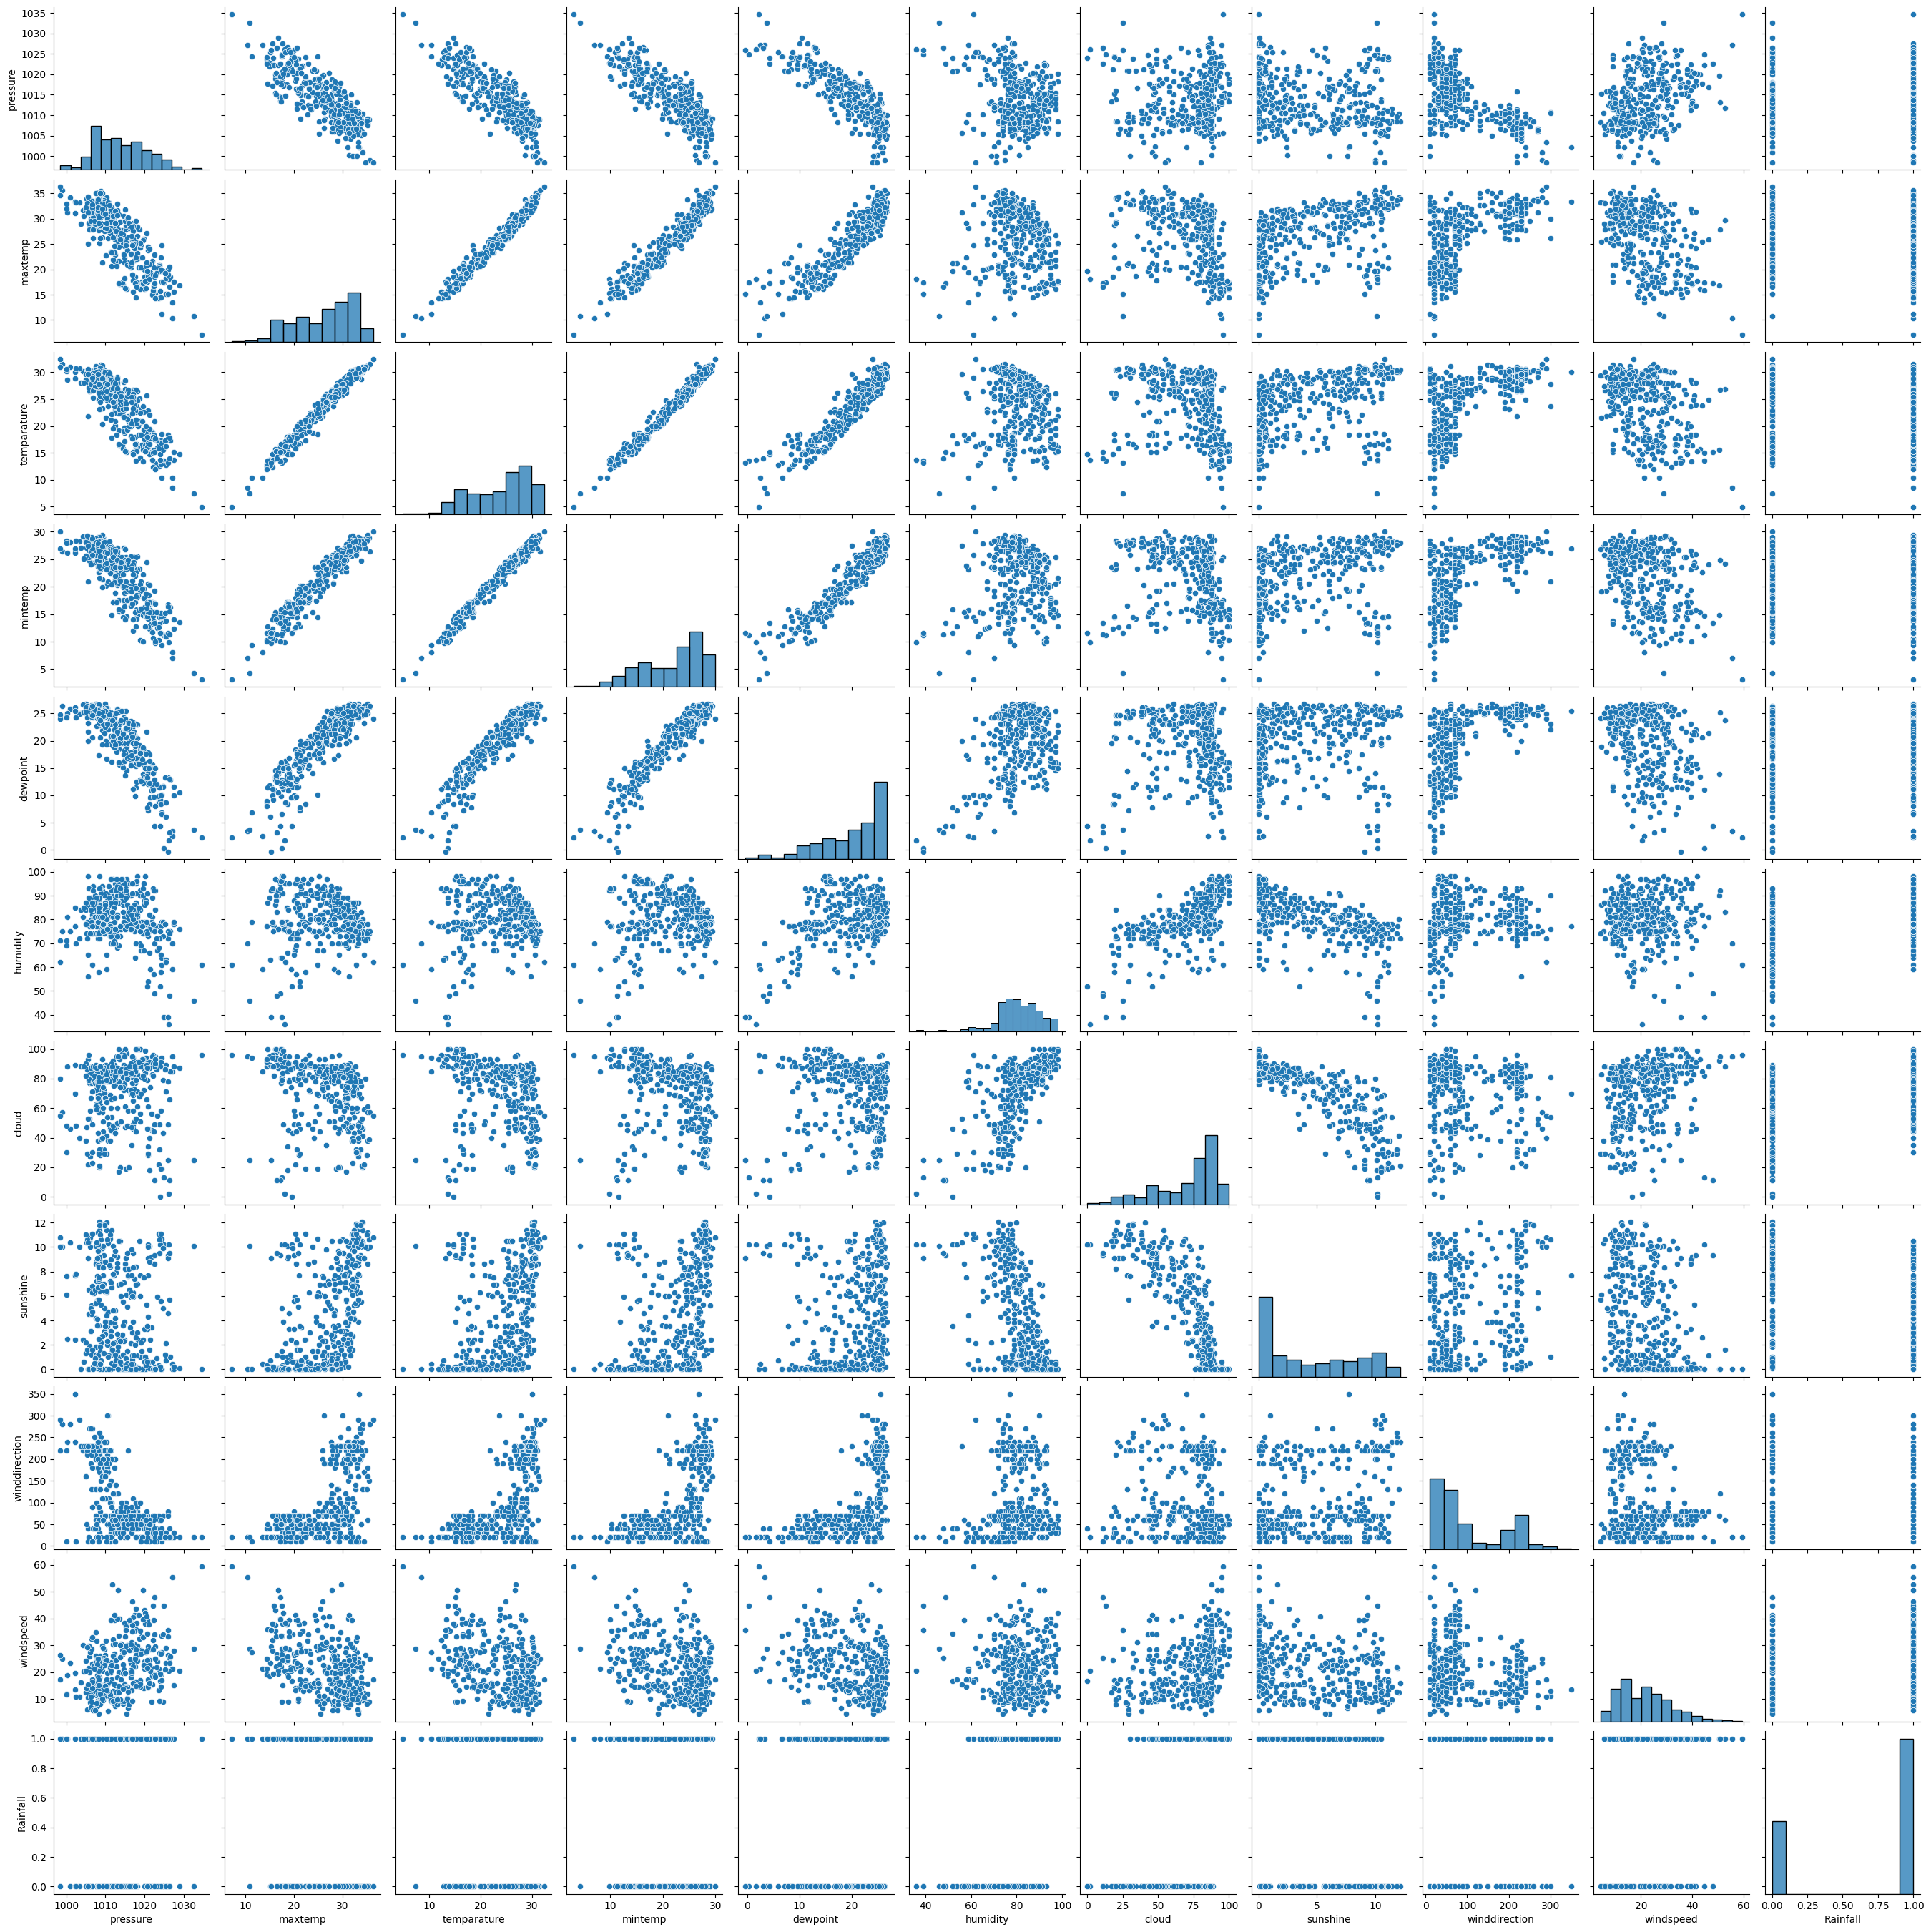

In [160]:
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation heatmap')

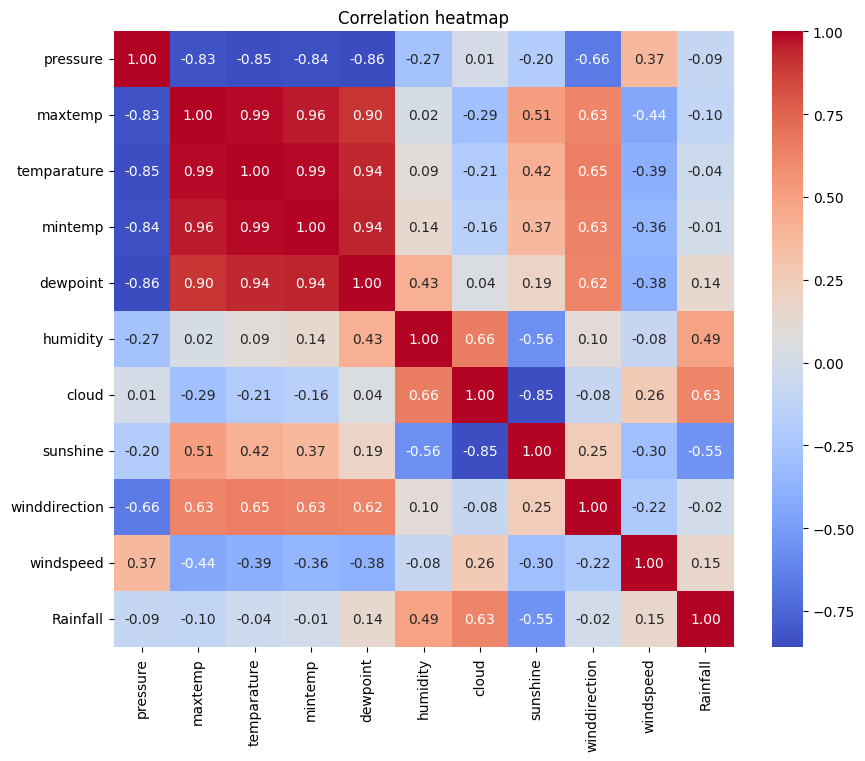

In [161]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")

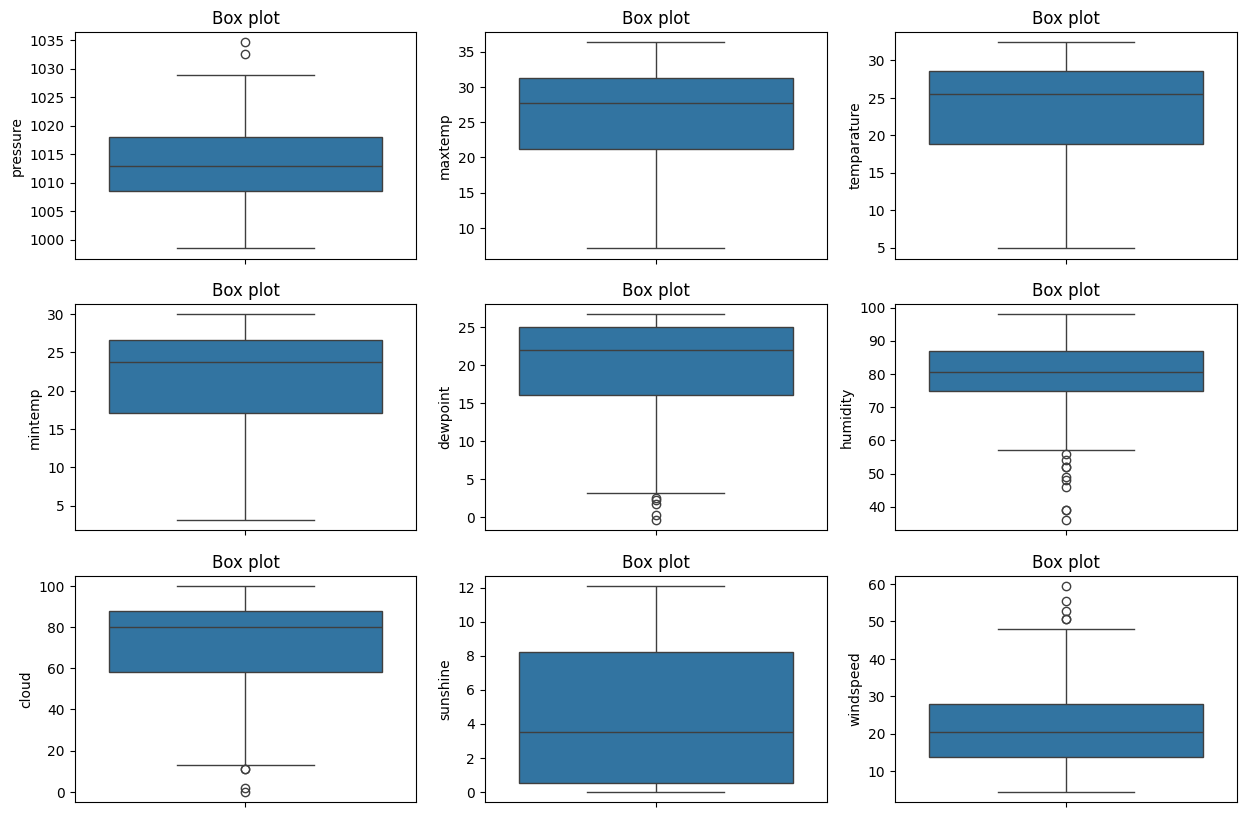

In [162]:
plt.figure(figsize=(15,10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
    plt.subplot(3,3,i)
    sns.boxplot(df[column])
    plt.title("Box plot")

In [163]:
df = df.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [164]:
df.head()

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,Rainfall
0,1025.9,13.1,72,49,9.3,80.0,26.3,1
1,1022.0,15.6,81,83,0.6,50.0,15.3,1
2,1019.7,18.4,95,91,0.0,40.0,14.2,1
3,1018.9,18.8,90,88,1.0,50.0,16.9,1
4,1015.9,19.9,95,81,0.0,40.0,13.7,1


In [165]:
df.Rainfall.value_counts()

Rainfall
1    249
0    117
Name: count, dtype: int64

In [166]:
df_majority = df[df['Rainfall'] ==1]
df_minority = df[df['Rainfall'] ==0]

In [167]:
## DownSampling
df_majoirty_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority))

In [168]:
df_majoirty_downsampled.shape

(117, 8)

In [169]:
df_downsampled = pd.concat([df_minority, df_majoirty_downsampled])

In [170]:
df_downsampled

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,Rainfall
6,1021.8,15.0,79,56,3.4,30.0,21.5,0
7,1020.8,14.4,78,28,7.7,60.0,14.3,0
8,1020.6,14.3,78,79,3.3,70.0,39.3,0
11,1019.9,13.7,79,86,0.6,20.0,23.9,0
12,1020.8,12.1,77,34,9.1,30.0,24.4,0
...,...,...,...,...,...,...,...,...
102,1009.1,19.3,94,88,0.0,70.0,29.8,1
307,1019.5,18.8,74,82,2.4,70.0,32.9,1
105,1011.4,20.6,97,88,0.0,30.0,20.0,1
81,1013.4,16.0,96,100,0.0,50.0,33.5,1


In [171]:
df_downsampled.Rainfall.value_counts()

Rainfall
0    117
1    117
Name: count, dtype: int64

In [172]:
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [173]:
df_downsampled.shape

(234, 8)

In [174]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,Rainfall
0,1002.4,24.3,70,48,7.8,10.0,11.0,0
1,1009.8,25.6,82,70,6.4,220.0,22.6,1
2,1018.3,16.3,79,89,2.4,40.0,14.8,1
3,1021.8,10.9,76,45,9.2,40.0,9.1,0
4,1008.1,25.3,81,78,1.1,40.0,16.4,1


In [175]:
df.Rainfall.value_counts()

Rainfall
1    249
0    117
Name: count, dtype: int64

In [178]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [179]:
X

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,9.3,80.0,26.3
1,1022.0,15.6,81,83,0.6,50.0,15.3
2,1019.7,18.4,95,91,0.0,40.0,14.2
3,1018.9,18.8,90,88,1.0,50.0,16.9
4,1015.9,19.9,95,81,0.0,40.0,13.7
...,...,...,...,...,...,...,...
361,1022.7,15.0,84,90,0.0,30.0,18.4
362,1026.6,12.8,75,85,1.0,20.0,25.9
363,1025.9,13.3,75,78,4.6,70.0,33.4
364,1025.3,13.3,78,86,1.2,20.0,20.9


In [180]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
361    1
362    1
363    1
364    1
365    0
Name: Rainfall, Length: 366, dtype: int64

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [185]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
y_pred1 = model1.predict(X_test)
print(accuracy_score(Y_test, y_pred1))

0.8513513513513513


In [ ]:
model2 = KNeighborsClassifier()
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)
print(accuracy_score(Y_test, y_pred2))

0.8243243243243243


In [191]:
model3 = SVC()
model3.fit(X_train, Y_train)
y_pred3 = model3.predict(X_test)
print(accuracy_score(Y_test, y_pred3))

0.7162162162162162


In [192]:
model4 = DecisionTreeClassifier()
model4.fit(X_train, Y_train)
y_pred4 = model4.predict(X_test)
print(accuracy_score(Y_test, y_pred4))

0.7297297297297297


In [193]:
model5 = RandomForestClassifier()
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)
print(accuracy_score(Y_test, y_pred5))

0.8648648648648649


In [196]:
print(confusion_matrix(Y_test, y_pred5))

[[14  7]
 [ 3 50]]


In [197]:
print(classification_report(Y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.82      0.67      0.74        21
           1       0.88      0.94      0.91        53

    accuracy                           0.86        74
   macro avg       0.85      0.81      0.82        74
weighted avg       0.86      0.86      0.86        74

